In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-2-2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545429,35.424697,26.900123,29.051487,855215656
2007-10-08,30.879341,33.645379,30.685232,33.645379,126671715
2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
2007-10-10,33.289516,33.968895,32.998355,33.839488,67931378
2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.483549,80.517027,78.462750,79.520589,1.188963e+07
std,63.570576,64.313381,62.779670,63.552224,2.061999e+07
min,19.001740,20.312204,17.036043,20.213919,0.000000e+00
25%,36.529129,37.105429,35.989646,36.566534,4.799653e+06
50%,55.504936,56.145821,54.762117,55.611507,8.344398e+06
75%,83.112988,84.105047,82.127439,83.135600,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [9]:
df = df.reset_index()

In [11]:
df.columns

MultiIndex([( 'index',             ''),
            (  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [14]:
df.to_csv("powergrid.csv")

In [15]:
data01 = pd.read_csv("powergrid.csv")

In [16]:
data01.head()

,Price,index,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,0.0,2007-10-05,32.54542922973633,35.424697482052096,26.900123201294626,29.0514868911543,855215656
2,1,1.0,2007-10-08,30.87934112548828,33.64537923155225,30.685232341427458,33.64537923155225,126671715
3,2,2.0,2007-10-09,32.98217010498047,33.27333102819074,29.229417128249786,30.895508777439975,116725709
4,3,3.0,2007-10-10,33.28951644897461,33.96889505208489,32.998355444192676,33.839488454654,67931378


In [17]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [21]:
df.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,0,2007-10-05,32.545429,35.424697,26.900123,29.051487,855215656
1,1,2007-10-08,30.879341,33.645379,30.685232,33.645379,126671715
2,2,2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
3,3,2007-10-10,33.289516,33.968895,32.998355,33.839488,67931378
4,4,2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


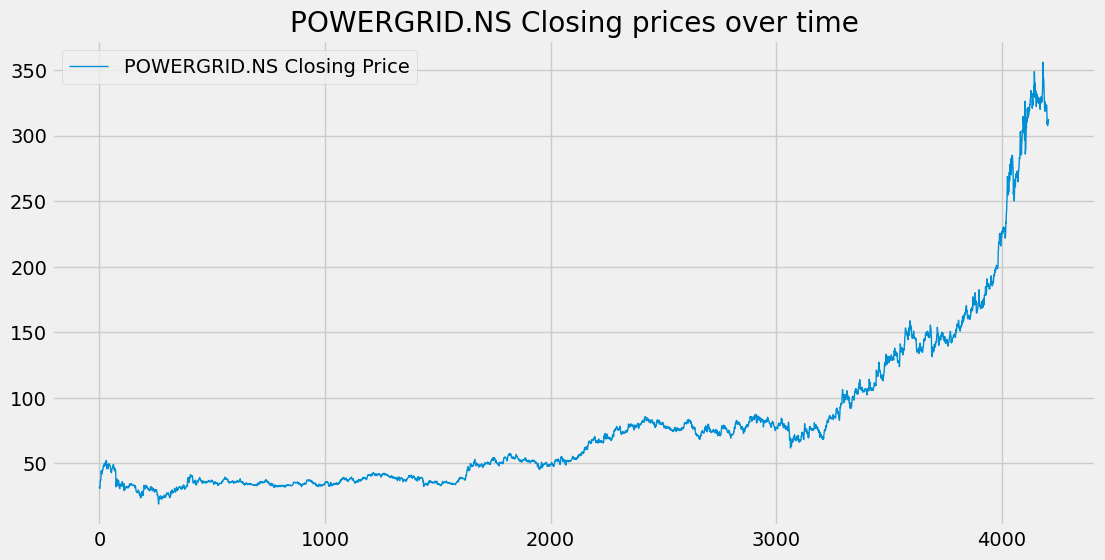

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

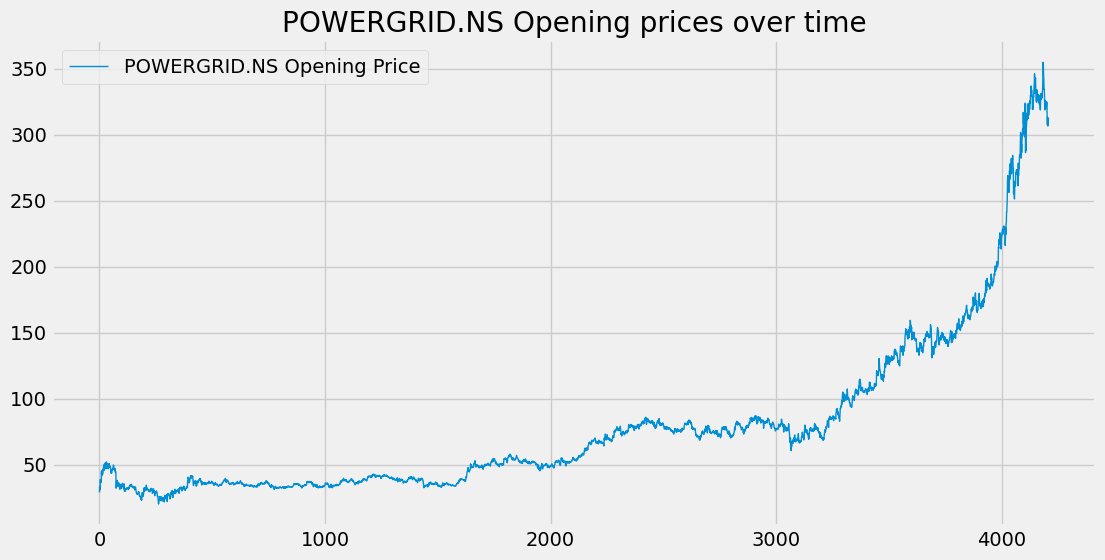

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

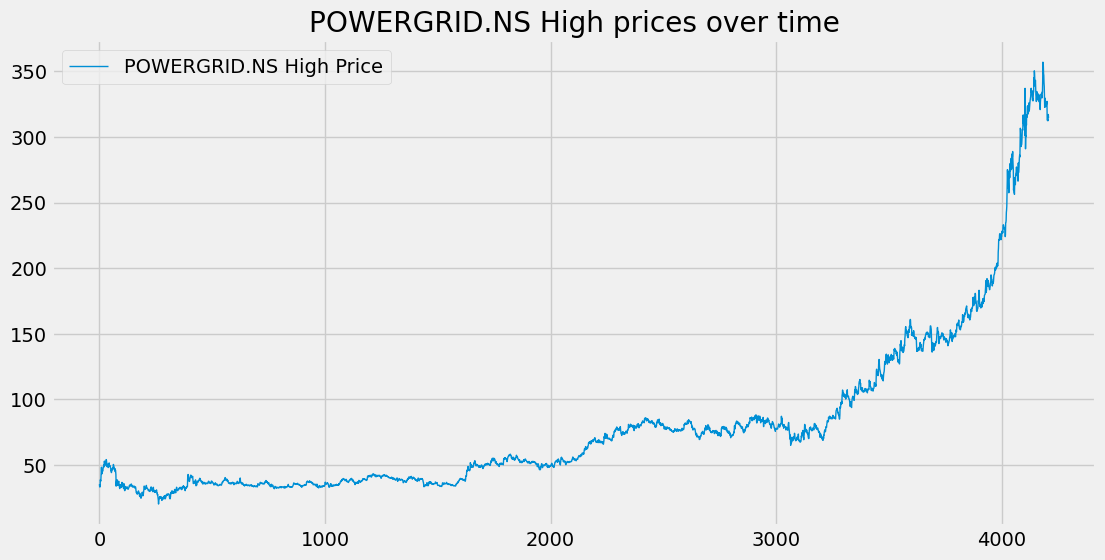

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

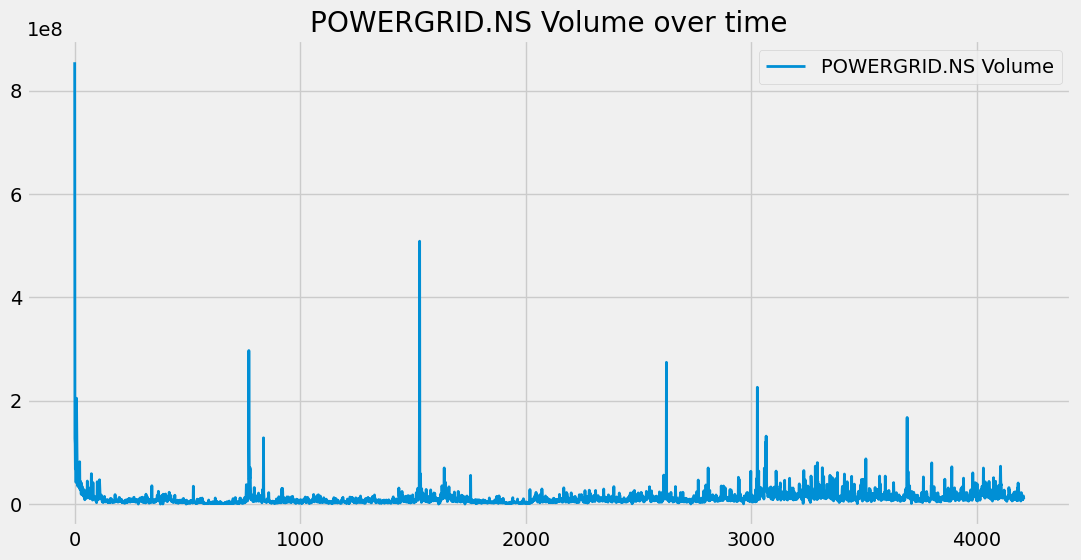

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [26]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [27]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [28]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [29]:
ma100 = df.Close.rolling(100).mean()

In [30]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [31]:
ma200 = df.Close.rolling(200).mean()

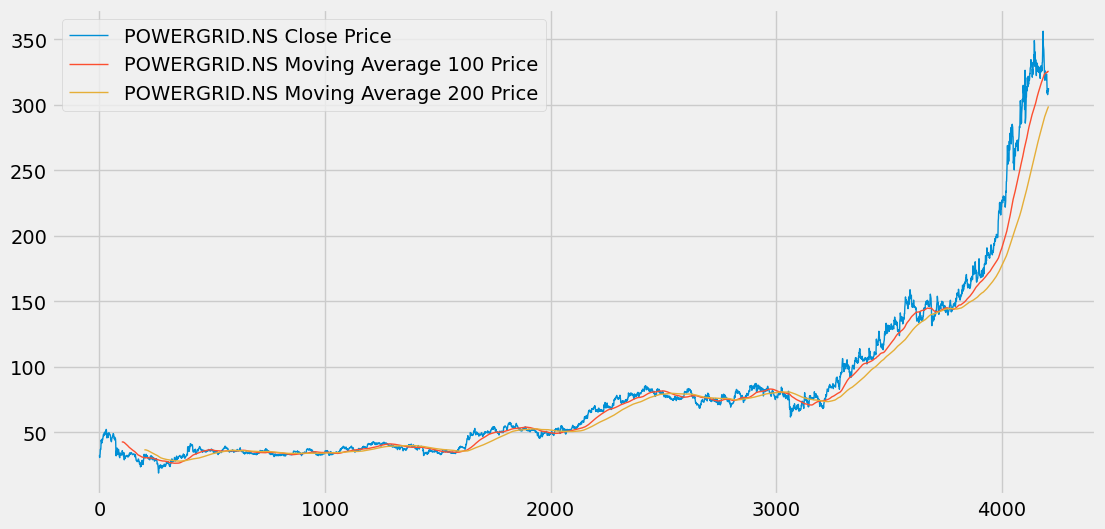

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [33]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [34]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

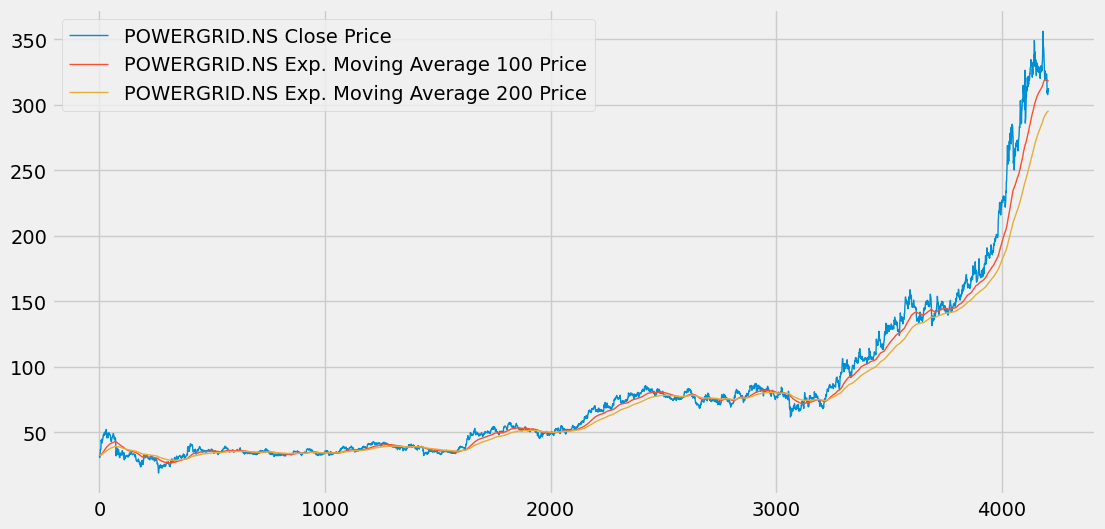

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [36]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [37]:
data_training.shape

(2945, 1)

In [38]:
data_testing.shape

(1263, 1)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [40]:
data_training_array = scaler.fit_transform(data_training)

In [41]:
data_training_array

array([[0.19808603],
       [0.17371832],
       [0.20447368],
       ...,
       [0.90774396],
       [0.86000376],
       [0.87299642]])

In [42]:
data_training_array.shape[0]

2945

In [43]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [44]:
x_train.shape

(2845, 100, 1)

In [45]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [46]:
# LSTM Input -> 3D Array (batch_size, time_steps, seq_len) LSTM 2D OR 3D 2D -> (batch_sizem units) 3D -> (batch_size, time_steps, units)

In [47]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 256ms/step - loss: 0.0771
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - loss: 0.0075
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - loss: 0.0063
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - loss: 0.0055
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - loss: 0.0052
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - loss: 0.0061
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - loss: 0.0047
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 241ms/step - loss: 0.0048
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - loss: 0.0047
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - loss: 0.0043
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - loss: 0.0043
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - loss: 0.0044
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 257ms/step - loss: 0.0036
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 245ms/step - loss: 0.0039
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [50]:
past_100_days = data_training.tail(100)

In [65]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [66]:
final_df.head()

Ticker,POWERGRID.NS
0,76.105644
1,77.657158
2,77.922539
3,77.759216
4,78.208336


In [57]:
input_data = scaler.fit_transform(final_df)

In [58]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [59]:
x_test.shape

(1263, 100, 1)

In [60]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step


In [61]:
y_predicted.shape

(1263, 1)

In [62]:
scaler.scale_

array([0.00339719])

In [63]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

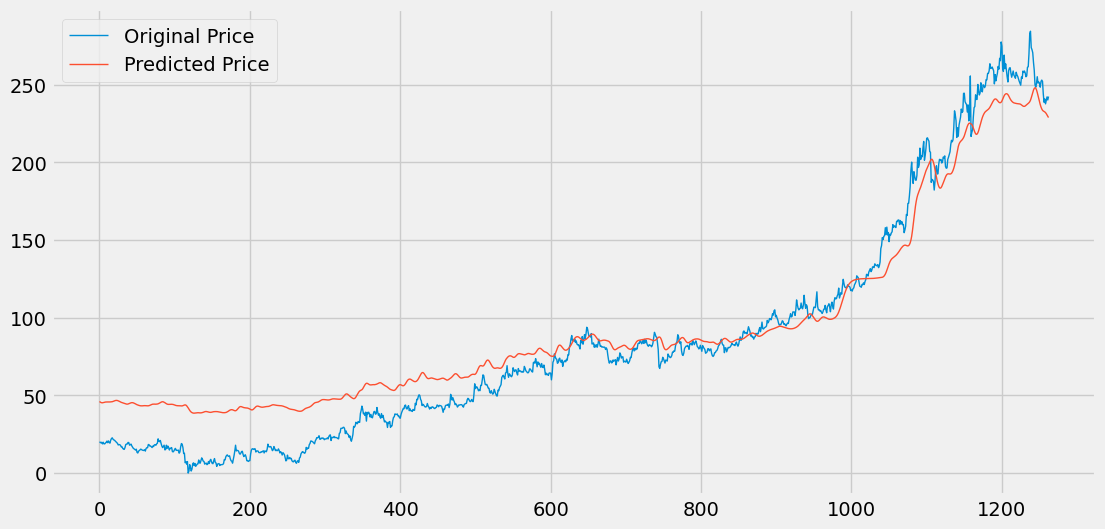

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [68]:
model.save('stock_dl_model.h5')